# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv("homepage_actions.csv")

There are 8188 observations with 6328 unique IDs. 3332 IDs are in the control group and 2996 IDs are in the experimental group.
1860 IDs viewed and clicked.
0 IDs clicked but did not view.
0 IDs overlap between the control group and the experiment group


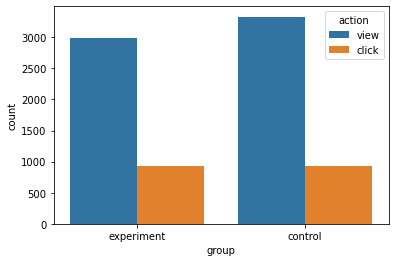

In [129]:
print("There are {} observations with {} unique IDs. {} IDs are in the control group and \
{} IDs are in the experimental group.".format(len(df), len(df["id"].unique()), \
                                             len(df.loc[df["group"] == "control", "id"].unique()), \
                                             len(df.loc[df["group"] == "experiment", "id"].unique())))

viewed_and_clicked = sum(df.loc[df["action"] == "view", "id"].isin(df.loc[df["action"] == "click", "id"]))
print("{} IDs viewed and clicked.".format(viewed_and_clicked))

clicked_but_not_viewed = sum(~df.loc[df["action"] == "click", "id"].isin(df.loc[df["action"] == "view", "id"]))
print("{} IDs clicked but did not view.".format(clicked_but_not_viewed))

overlap_between_control_experiment = sum(df.loc[df["group"] == "control", "id"].isin(df.loc[df["group"] == "experiment", "id"]))
print("{} IDs overlap between the control group and the experiment group".format(overlap_between_control_experiment))

ax = sns.countplot(x = "group", data = df, hue = "action")

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [135]:
independence_table = pd.crosstab(df["group"], df["action"])
chi2, p, dof, ex = stats.chi2_contingency(independence_table)
print(chi2, p)

3.636160051233291 0.056537191086915774


## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [141]:
total_experiment = len(df[(df["group"] == "experiment") & (df["action"] == "view")])
total_control = len(df[(df["group"] == "control") & (df["action"] == "view")])

actual_experiment = len(df[(df["group"] == "experiment") & (df["action"] == "click")])
actual_control = len(df[(df["group"] == "control") & (df["action"] == "click")])

ctr_experiment = actual_experiment / total_experiment
ctr_control = actual_control / total_control

expected_experiment = total_experiment * ctr_control

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [144]:
std_experiment = (actual_experiment - expected_experiment) / np.sqrt(total_experiment * ctr_control * (1 - ctr_control))
std_experiment

3.6625360854823588

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [148]:
stats.norm.sf(std_experiment)

0.00012486528006951198

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: The result does not seem to match that of the previous statistical test, as the previous statistical test failed to reject the null hypothesis whereas this result does reject it.

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.